## Observations and Insights 
1. Average tumor volume is correlated to mouse weight for the Capomulin regimen.
2. Propriva regimen had the lowest number of total measurements. 
3. There were slightly more male than female mice in the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata)
# print(study_results)

# Combine the data into a single dataset
single_dataset_df=pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview
single_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mouse_id_gp=single_dataset_df.groupby('Mouse ID')
print(len(mouse_id_gp.count()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mousebytimepoint_s=mouse_id_gp['Timepoint'].value_counts()!=1
# print(type(mousebytimepoint_s),mousebytimepoint_s)

mouse_timepoint_df=single_dataset_df.groupby(['Mouse ID','Timepoint']).count()
# print(type(mouse_timepoint_df))
# print(mouse_timepoint_df)

mouse_timepoint_df['Duplicates']=mousebytimepoint_s
# print(type(mouse_timepoint_df))
# print(mouse_timepoint_df)

duplicate_mouse_timepoint_df=mouse_timepoint_df.groupby(['Duplicates','Mouse ID']).count()
# print(duplicate_mouse_timepoint_df)
# print(duplicate_mouse_timepoint_df.index)

duplicate_mouse_timepoint_df=duplicate_mouse_timepoint_df.reset_index(level='Mouse ID')
# print(duplicate_mouse_timepoint_df)
# print(duplicate_mouse_timepoint_df.index)

duplicate_mouse_id=duplicate_mouse_timepoint_df.loc[True,'Mouse ID']
print(duplicate_mouse_id)

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_id_df=single_dataset_df.set_index('Mouse ID')
# print(mouse_id_df)

duplicate_mouse_data=mouse_id_df.loc[duplicate_mouse_id,:]
duplicate_mouse_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_id_df=mouse_id_df.drop(duplicate_mouse_id)
# print(clean_mouse_id_df)
clean_df=clean_mouse_id_df.reset_index()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

print(len(clean_df['Mouse ID'].value_counts()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

clean_gp=clean_df.groupby('Drug Regimen')
volume_statistics_df=clean_gp['Tumor Volume (mm3)'].describe()
summary_statistics_df=volume_statistics_df.reset_index()

median=clean_gp['Tumor Volume (mm3)'].median()
median=median.reset_index()
variance=clean_gp['Tumor Volume (mm3)'].var()
variance=variance.reset_index()
sem=clean_gp['Tumor Volume (mm3)'].sem()
sem=sem.reset_index()

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df['Median']=median['Tumor Volume (mm3)']
summary_statistics_df['Variance']=variance['Tumor Volume (mm3)']
summary_statistics_df['Standard Error Measure']=sem['Tumor Volume (mm3)']
summary_statistics_df=summary_statistics_df.rename(columns={'mean':'Mean','std':'Standard Deviation'})
summary_statistics_df=summary_statistics_df[['Drug Regimen','Mean','Median','Variance','Standard Deviation','Standard Error Measure']]

summary_statistics_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,Standard Error Measure
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen=summary_statistics_df['Drug Regimen']
mean=clean_gp['Tumor Volume (mm3)'].mean()
mean=mean.reset_index()
std=clean_gp['Tumor Volume (mm3)'].std()
std=std.reset_index()

summary_statistics={
    'Drug Regimen':regimen,
    'Mean':mean['Tumor Volume (mm3)'],
    'Median':median['Tumor Volume (mm3)'],
    'Variance':variance['Tumor Volume (mm3)'],
    'Standard Deviation':std['Tumor Volume (mm3)'],
    'Standard Error Measure':sem['Tumor Volume (mm3)']
}
summary_statistics_df=pd.DataFrame(summary_statistics)

# print(summary_statistics_df)

# Using the aggregation method, produce the same summary statistics in a single line

# agg_df=clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

agg_df=clean_df.groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc="mean"),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc="median"),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc="var"),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc="std"),
    Standard_Error=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc="sem"),
)
# print(agg_df)

agg_drug_regimen=agg_df.agg('mean')

print(type(agg_drug_regimen))
print(agg_drug_regimen)

<class 'pandas.core.series.Series'>
Mean                  50.975982
Median                49.902123
Variance              47.858440
Standard_Deviation     6.821103
Standard_Error         0.502785
dtype: float64


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Measurements'>

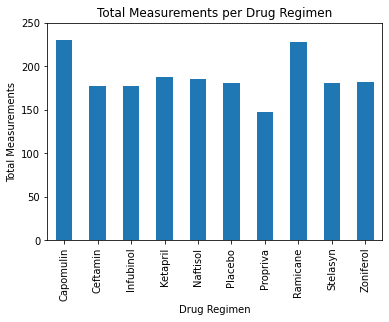

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_count_df=clean_gp.count()
clean_count_df['Total Measurements']=clean_count_df.iloc[:,0]
measurements_s=clean_count_df['Total Measurements']

measurements_s.plot.bar(title='Total Measurements per Drug Regimen', ylabel='Total Measurements',ylim=(0, max(measurements_s)+20))


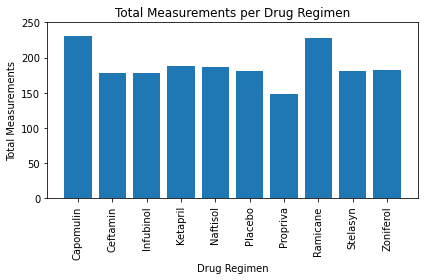

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements_df=measurements_s.reset_index()

x_axis=measurements_df['Drug Regimen']
y_axis=measurements_df['Total Measurements']
# bar_labels=[value for value in x_axis]
# tick_locations=[value for value in x_axis]
# print(y_axis)
# print(x_axis)
# print(bar_labels)
# print(tick_locations)

plt.bar(x_axis, y_axis)
plt.xticks(rotation='vertical')

plt.title('Total Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)

plt.tight_layout()

plt.show()

<AxesSubplot:title={'center':'Percent Female vs. Male Mice'}, ylabel=' '>

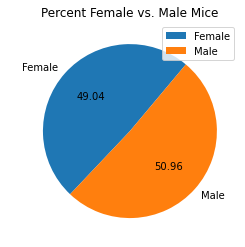

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count_df=clean_df.groupby('Sex').count()
sex_count_df['Count']=sex_count_df.iloc[:,0]
sex_s=sex_count_df['Count']
# print(sex_s)

sex_s.plot.pie(title='Percent Female vs. Male Mice',ylabel=' ',autopct="%.2f",startangle=50,legend=True)


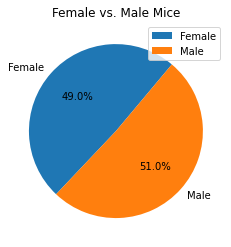

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_s=sex_s.reset_index()

sizes=sex_s['Count']
labels=sex_s['Sex']
# print(sizes)
# print(labels)    

plt.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=50)
plt.title('Female vs. Male Mice')
plt.legend(loc="best")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_df=clean_df.groupby(['Mouse ID'])['Timepoint'].max()
mouse_max_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_merge_df=pd.merge(clean_df,mouse_max_df, on=['Mouse ID', 'Timepoint'], how='right',suffixes=('_orig.','_final'))

max_timepoint_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

results_dict={'Capomulin':None, 'Ramicane':None,'Infubinol':None,'Ceftamin':None}

for drug in results_dict:
    tumor_volume=max_timepoint_merge_df.loc[max_timepoint_merge_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
#     print(drug)
#     print(type(tumor_volume))
#     print(tumor_volume)
    quartiles=tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    results_dict[drug]=tumor_volume
    print(drug)
    print('Quartiles:')
    print(quartiles)
    print(drug)
    print(f'IQR = {iqr}')
    print(f'Lower Bound: <{lower_bound}')
    print(f'Upper Bound: >{upper_bound}')
    print('')
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin
Quartiles:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Capomulin
IQR = 7.781863460000004
Lower Bound: <20.70456164999999
Upper Bound: >51.83201549

Ramicane
Quartiles:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
Ramicane
IQR = 9.098536719999998
Lower Bound: <17.912664470000003
Upper Bound: >54.30681135

Infubinol
Quartiles:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
Infubinol
IQR = 11.477135160000003
Lower Bound: <36.83290494999999
Upper Bound: >82.74144559000001

Ceftamin
Quartiles:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
IQR = 15.577752179999997
Lower Bound: <25.355449580000002
Upper Bound: >87.66645829999999



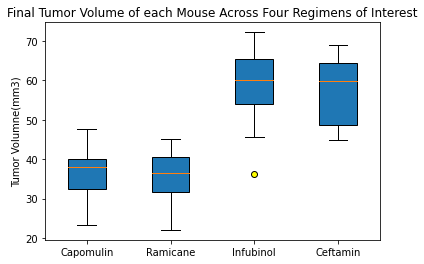

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume_list = [v for k, v in results_dict.items()]
# print(final_tumor_volume_list)
plt.boxplot(final_tumor_volume_list, labels=results_dict.keys(), patch_artist=True, flierprops=dict(markerfacecolor='yellow',markeredgecolor='black'))
plt.title('Final Tumor Volume of each Mouse Across Four Regimens of Interest')
plt.ylabel('Tumor Volumne(mm3)')

plt.show()

## Line and Scatter Plots

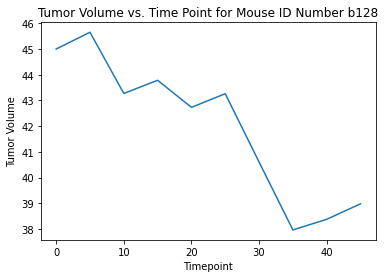

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap=clean_df.groupby(['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']).count()
cap=cap.reset_index()
# print(cap.head(10))

mouse=cap.iloc[0,1]
# print(mouse)
timepoint=cap.iloc[0:10,2]
# print(type(timepoint),timepoint)
tumor=cap.iloc[0:10,3]
# print(type(tumor),tumor)
# print(cap.head(10))

plt.plot(timepoint, tumor)
plt.title('Tumor Volume vs. Time Point for Mouse ID Number b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

plt.show()

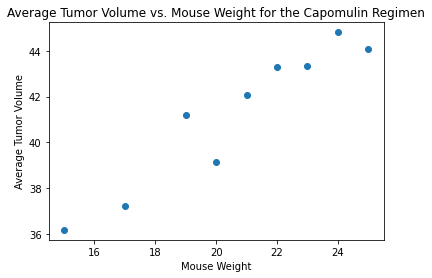

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_weight=clean_df.groupby(['Drug Regimen','Weight (g)']).mean()
cap_weight=cap_weight.reset_index()
# print(cap_weight.head(20))

weight=cap_weight.iloc[:9,1]
# print(type(weight),weight)
tumor=cap_weight.iloc[:9,4]
# print(type(tumor),tumor)

plt.scatter(weight, tumor)
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

plt.show()

## Correlation and Regression

The r-value is: 0.950524396185527
The r-squared is: 0.9034966277438606


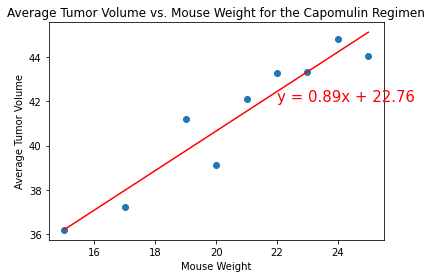

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight
y_values = tumor

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,42),fontsize=15,color="red")
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()